<h1> Równania różniczkowe zwyczajne <h1>
<h3>Wprowadzenie do wszystkich zadań</h3>
    
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 1</h3>

Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

<h3>Zad 2</h3>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace
cialo niebieskie z pewną (zadawana przez uzytkownika) prędkością 
poczatkową. 

http://www.artcompsci.org/msa/web/vol_1/v1_web/v1_web.html

Rozszerzenie: rozszerz symulację dla układu trzech ciał poruszających się w polu grawitacyjnym, 

* https://www.kwantowo.pl/2019/09/08/zagadka-ruchu-trzech-cial/

* https://arxiv.org/pdf/1508.02312.pdf

* https://www.wired.com/2016/06/way-solve-three-body-problem/

<h3>Zad3</h3>

Zasymuluj model drapieżnik - ofiara 

x(t)- populacja drapieżników

y(t) -populacja ofiar 

a - współczynnik śmierci drapieżników z powodu braku
ofiar 

b- współczynnik narodzin ofiar, gdy nie ma drapieżników

c- efektywność z jaką drapieżnik wykorzystuje 
energię pozyskaną ze zjedzenia
ofiar  $0.0<c=<1.0$ 

d- efektywność uśmiercania ofiar przez drapieżników

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

Rozszerzenie:
Zasymulować wirtualne gatunki za pomocą automatu komórkowego:
* https://grimmel.github.io/posts/2020/10/blog-post-1/
* https://mathworld.wolfram.com/CellularAutomaton.html

<h3> Zad4</h3>

Zasymulować wahadlo magnetyczne. 
$$
\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t} 
$$

Dodatkowy materiał znajduje sie w książce: 
Jacek Kudrewicz "Fraktale" (scan załączony osobno) . 

Rozszerzenie: Proszę narysować atraktor Duffinga - trajektorię $(x(t),y(t))$ na płaszczyźnie $(x,y)$ dla różnych wartości parametrów $a,b,k$. 


<h3>Zad 5</h3>

Proszę przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka (1927)) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
$\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

S- osobniki podatne $S(0)> 0$

I- osobniki chorujące i roznoszące infekcję $I(0)>0$

R- osobniki ozdrowiałe $R(0)=0$.

Rozszerzenie: zaimplementować model epidemii jako automat komórkowy 
 * https://en.wikipedia.org/wiki/Epidemic_models_on_lattices
 * https://mathworld.wolfram.com/CellularAutomaton.html
 * https://grimmel.github.io/posts/2020/10/blog-post-1/


<h3>Zad6 (bez rozszerzeń-max 4 pkt)</h3>

Rozwiazać równanie różniczkowe dla rozpadu promieniotwórczego
$$\frac{du}{dt}+ \frac{u}{\tau}=0, u(0)=1$$
porownać z 
rozwiazaniem analitycznym 
$$u=e^{-\frac{t}{\tau}}$$
Zbadać stabilność metody Eulera gdy  $$\delta t \leq 2 \tau$$
oraz gdy $$\delta t > 2\tau$$

<h3>Zad7 (bez rozszerzeń-max 4 pkt)</h3>

Zasymulować drgania sprężyny wg równania:
$$m\frac{d^2x}{dt}=-kx $$



# Zad1


Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

Metoda Eulera:

In [1]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `C:\Users\danie\.julia\registries\General.toml`
   Resolving package versions...
   Installed TreeViews ──────────────────────── v0.3.0
   Installed GR_jll ─────────────────────────── v0.64.3+0
   Installed SIMDDualNumbers ────────────────── v0.1.1
   Installed HypergeometricFunctions ────────── v0.3.10
   Installed OffsetArrays ───────────────────── v1.12.1
   Installed Preferences ────────────────────── v1.3.0
   Installed MutableArithmetics ─────────────── v1.0.2
   Installed DifferentialEquations ──────────── v7.1.0
   Installed PDMats ─────────────────────────── v0.11.10
   Installed StatsFuns ──────────────────────── v1.0.1
   Installed DEDataArrays ───────────────────── v0.2.4
   Installed LabelledArrays ─────────────────── v1.10.0
   Installed NonlinearSolve ─────────────────── v0.3.19
   Installed StaticArrays ───────────────────── v1.4.4
   Installed Polyester ──────────────────────── v0.6.11
   Installed Sundials_jll ───────────────────── v5.2.1+0
  

  [3d5dd08c] + VectorizationBase v0.21.35
  [19fa3120] + VertexSafeGraphs v0.2.0
  [700de1a5] + ZygoteRules v0.2.2
  [2e619515] ↑ Expat_jll v2.4.4+0 ⇒ v2.4.8+0
  [d2c73de3] ↑ GR_jll v0.64.0+0 ⇒ v0.64.3+0
  [dad2f222] + LLVMExtra_jll v0.0.16+0
  [458c3c95] ↑ OpenSSL_jll v1.1.13+0 ⇒ v1.1.14+0
  [f50d1b31] + Rmath_jll v0.3.0+0
  [fb77eaff] + Sundials_jll v5.2.1+0
  [02c8fc9c] ↑ XML2_jll v2.9.12+0 ⇒ v2.9.14+0
  [4af54fe1] + LazyArtifacts
  [4607b0f0] + SuiteSparse
  [bea87d4a] + SuiteSparse_jll
    Building GR → `C:\Users\danie\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\b316fd18f5bc025fedcb708332aecb3e13b9b453\build.log`
Precompiling project...
  ✓ MuladdMacro
  ✓ PositiveFactorizations
  ✓ PDMats
  ✓ FunctionWrappers
  ✓ TensorCore
  ✓ StatsAPI
  ✓ CEnum
  ✓ UnPack
  ✓ FillArrays
  ✓ GenericSchur
  ✓ KrylovKit
  ✓ InverseFunctions
  ✓ ManualMemory
  ✓ Preferences
  ✓ PoissonRandom
  ✓ ZygoteRules
  ✓ Krylov
  ✓ SIMDTypes
  ✓ Compat
  ✓ MutableArithmetics
  ✓ TreeViews
  ✓ A

In [24]:
Pkg.add("OrdinaryDiffEq")

   Resolving package versions...
    Updating `C:\Users\danie\.julia\environments\v1.7\Project.toml`
  [1dea7af3] + OrdinaryDiffEq v6.14.0
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Manifest.toml`


In [25]:
using Plots
# using DifferentialEquations
using OrdinaryDiffEq
using DataFrames

In [9]:
g= 9.81
l = 2.0
x0 = 0.8 * l
v0 = 0.0
t_range = (0.0, 5.0)

(0.0, 5.0)

In [12]:
function euler(x0, v0, g, l, t_range, dt=0.005)
    n = Int((t_range[2] - t_range[1]) / dt)
    t = [i*dt + t_range[1] for i in 0:n]
    x = zeros(n+1)
    v = zeros(n+1)
    dx = 0
    dv = 0
    x[1] = x0
    v[1] = v0
    for i ∈ 1:n
        h = t[i+1] - t[i]
        dx = v[i]
        dv = -g / l * sin(x[i])
        x[i+1] = x[i] + h * dx
        v[i+1] = v[i] + h * dv
    end
    return [t, x, v]
end

euler (generic function with 2 methods)

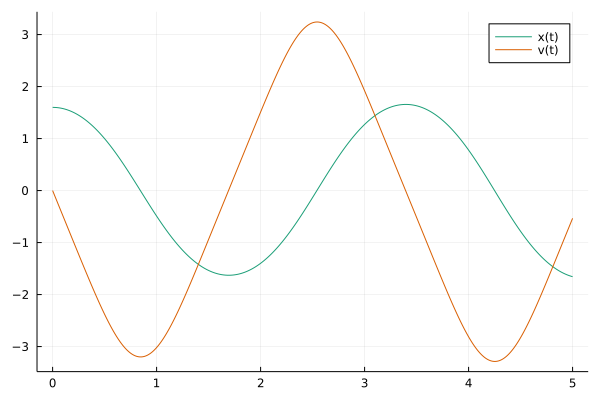

In [15]:
ts,xs,vs = euler(x0,v0,g,l,t_range)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

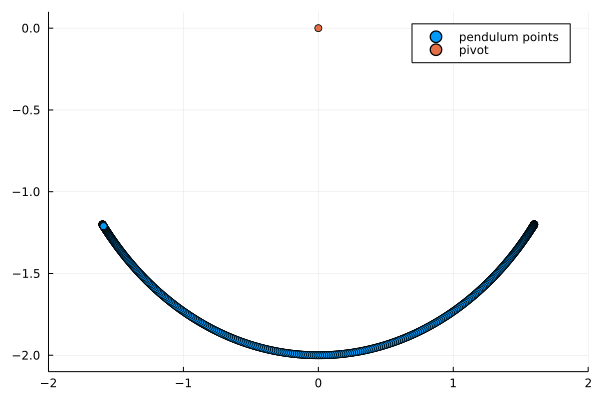

In [29]:
ys = [-sqrt(max(0, l^2 - x^2)) for x in xs]
plot()
scatter!(xs,ys,ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
scatter!((0,0),label="pivot")

Metoda Rungego-Kutty:

In [41]:
function onependulum!(du,u,p)
    g,l = p
    du[1] = u[2]
    du[2] = -g / l * sin(u[1])
end

onependulum! (generic function with 2 methods)

In [42]:
u0 = [x0,v0]
p = (g,l)
prob = ODEProblem(onependulum!,u0,t_range,p)
solution = solve(prob,Tsit5(),dt=0.005,adaptive=false)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1001-element Vector{Float64}:
 0.0
 0.005
 0.01
 0.015
 0.02
 0.025
 0.030000000000000002
 0.035
 0.04
 0.045
 0.049999999999999996
 0.05499999999999999
 0.05999999999999999
 ⋮
 4.944999999999917
 4.949999999999917
 4.954999999999917
 4.9599999999999165
 4.964999999999916
 4.969999999999916
 4.974999999999916
 4.979999999999916
 4.984999999999916
 4.989999999999916
 4.994999999999916
 5.0
u: 1001-element Vector{Vector{Float64}}:
 [1.6, 0.0]
 [1.5999387136251846, -0.024514557234814657]
 [1.5997548542817568, -0.04902920197003664]
 [1.5994484213155347, -0.07354402060144853]
 [1.5990194136454206, -0.09805909731554026]
 [1.5984678297772088, -0.12257451298475613]
 [1.5977936678229185, -0.14709034406261678]
 [1.5969969255256509, -0.1716066614786793]
 [1.5960776002899713, -0.1961235295333027]
 [1.5950356892178197, -0.2206410047921915]
 [1.5938711891499475, -0.24515913498069639]
 [1.5925840967128844, -0.26967795787785

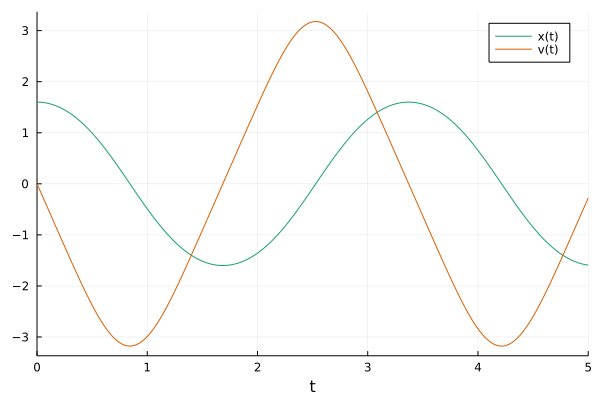

In [43]:
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

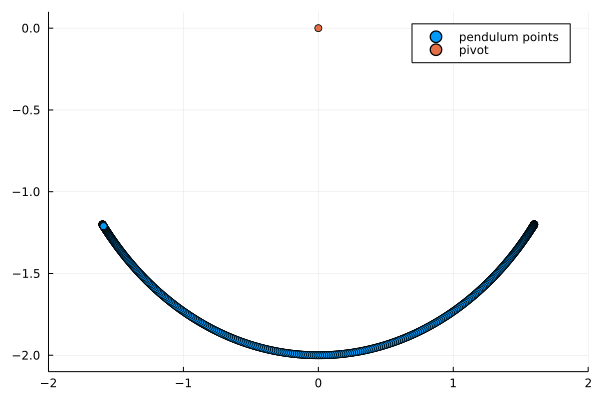

In [45]:
ys = [-sqrt(max(0, l^2 - x[1]^2)) for x in solution.u]
xs = [x[1] for x in solution.u]
plot()
scatter!(xs,y,ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
scatter!((0,0),label="pivot")

# Porównanie stabilności:

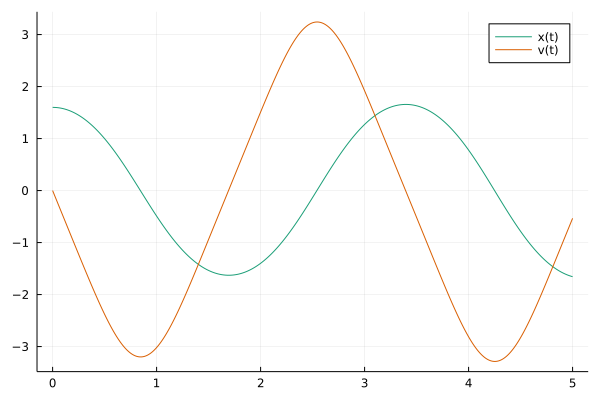

In [49]:
dt = 0.005
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

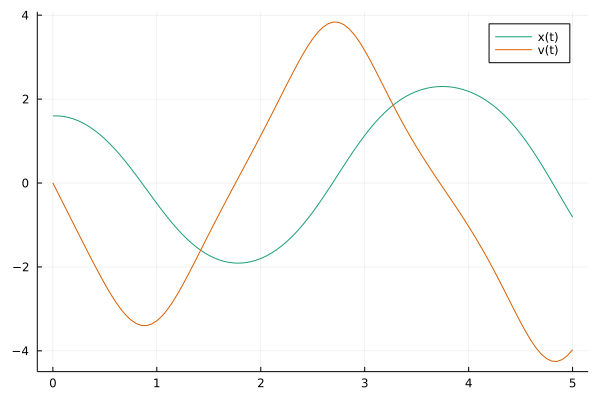

In [50]:
dt = 0.05
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

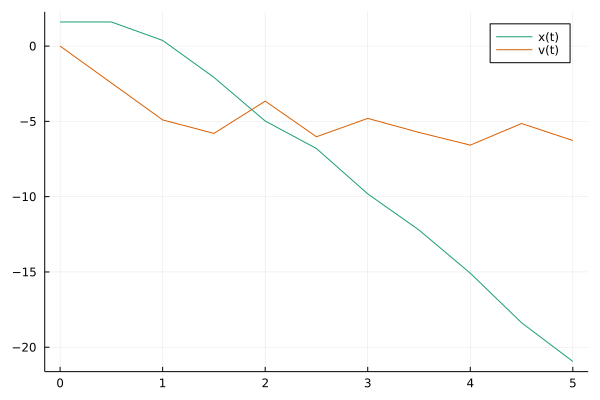

In [51]:
dt = 0.5
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

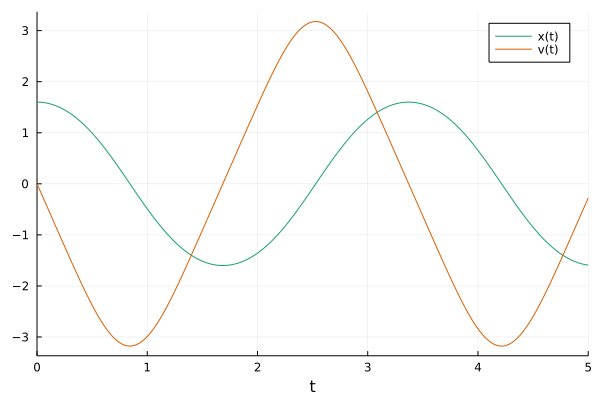

In [53]:
solution = solve(prob,Tsit5(),dt = 0.005,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

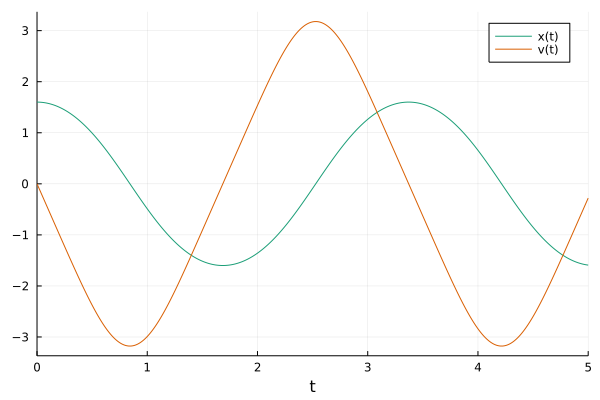

In [54]:
solution = solve(prob,Tsit5(),dt = 0.05,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

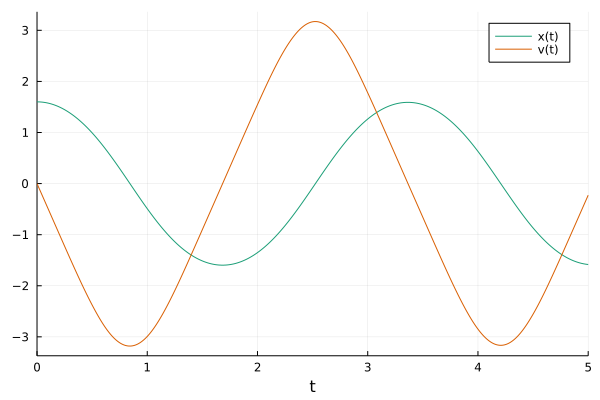

In [55]:
solution = solve(prob,Tsit5(),dt=0.5,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

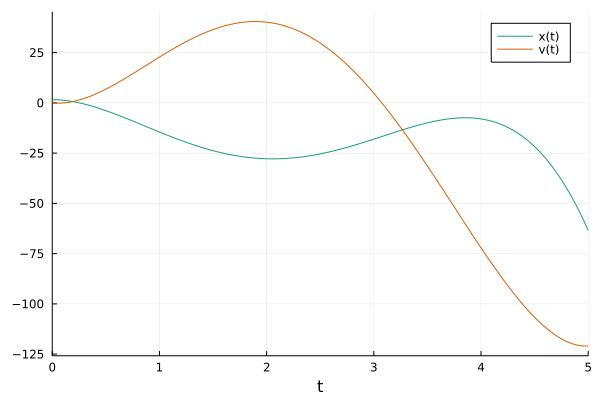

In [57]:
solution = solve(prob,Tsit5(),dt=5,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

Dla dt = 0.5 przy metodzie Eulera błąd jest bardzo duży, a przy metdozie Rungego-Kutty, zatem ta druga metoda
jest dużo bardziej stabilna od tej pierwszej.


# Ciekawa animacja

In [73]:
g= 9.81
l = 2.0
x0 = 0.8 * l
v0 = 0.0
t_range = (0.0, 5.0)

(0.0, 5.0)

In [63]:
ts,xs,vs = euler(x0,v0,g,l,t_range)
ys = [-sqrt(max(0, l^2 - x^2)) for x in xs]
n = Int((t_range[2] - t_range[1]) / dt)

1000

┌ Info: Saved animation to 
│   fn = C:\Users\danie\animation_of_good_euler.gif
└ @ Plots C:\Users\danie\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\danie\\animation_of_good_euler.gif")
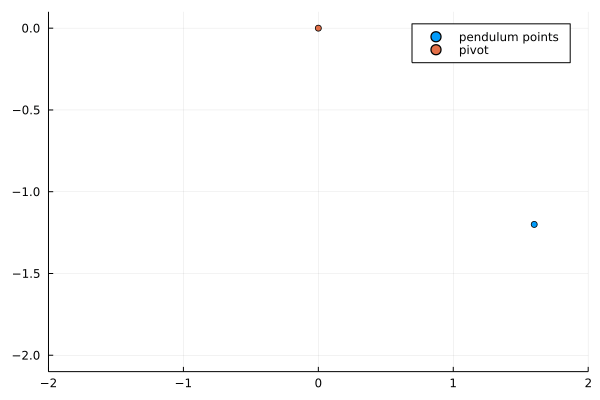

In [69]:
anim = @animate for i in 1:5:n
    plot()
    scatter!([xs[i]],[ys[i]],ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
    scatter!((0,0),label="pivot")
end

gif(anim, "animation_of_good_euler.gif", fps = 30)

In [107]:
g= 9.81
l = 2.0
x0 = 0.8 * l
v0 = 0.0
t_range = (0.0, 20.0)
dt = 0.01

0.01

In [108]:
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
ys = [-sqrt(max(0, l^2 - x^2)) for x in xs]
n = Int((t_range[2] - t_range[1]) / dt)

2000

┌ Info: Saved animation to 
│   fn = C:\Users\danie\animation_of_bad_euler.gif
└ @ Plots C:\Users\danie\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\danie\\animation_of_bad_euler.gif")
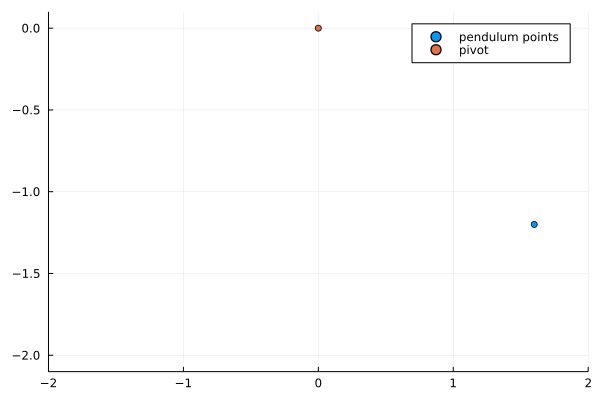

In [110]:
anim = @animate for i in 1:20:n
    plot()
    scatter!([xs[i]],[ys[i]],ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
    scatter!((0,0),label="pivot")
end

gif(anim, "animation_of_bad_euler.gif", fps = 30)